# Forward and backward pass (MLP)

## Team members:

* Project Manager - Kairat Kabdushev 
* Technical writer - Aruzhan Omarova 
* Author of executable content - Arnur Nurov
* Designer of interactive plots - Zhanibek Saduakas
* Designer of quizzes - Kairat Kabdushev 

## Learning objectives

- The structure of Neural network
- Forward pass
- Backward pass
- Batch training

### The structure of neural network 

The forward pass encompasses transmitting data through neurons, starting at the initial layer and progressing through subsequent layers until it reaches the final layer, which is also called the output layer. Following this, the backward pass takes place, during which adjustments or updates are made to the weights and biases according to the output.

In the basics of a neural network, the Multilayer Perceptron (MLP) architecture typically consists of three main parts:

Inputs: These are the initial data points or features that are fed into the neural network for processing. They form the first layer of the network.

Hidden Layers: These layers exist between the input and output layers and perform computations on the input data through interconnected neurons. They extract and transform features, allowing the network to learn complex patterns. A neural network can have one or multiple hidden layers, depending on its architecture.

Outputs: The final layer of the neural network produces the results or predictions based on the computations performed in the hidden layers. The number of neurons in the output layer is determined by the nature of the task—regression, classification, etc.—the network is designed for.


<img src="https://www.researchgate.net/publication/355373442/figure/fig1/AS:1080268202999810@1634567418319/Basic-structure-of-MLP-network-5.ppm" alt="Alt text" width="600">

More specifically, a neural network is a composition of **layers**:

$$
    F_{\boldsymbol \theta}(\boldsymbol x) = \big(f^{(L)}_{\boldsymbol \theta_L}  \circ \ldots \circ f^{(1)}_{\boldsymbol \theta_1}\big)(\boldsymbol x), \quad f^{(i)}_{\boldsymbol \theta_i}  \colon \mathbb R^{n_{i-1}} \to \mathbb R^{n_i}
$$

* $n_i$ is the size of $i$-th layer, $n_0 = n_{\mathrm{in}}$, $n_L = n_{\mathrm{out}}$
* $\boldsymbol \theta_i$ are parameters of $i$-th layer, $\boldsymbol \theta = (\boldsymbol \theta_1,\ldots, \boldsymbol \theta_L)$
* $\boldsymbol x_i = f^{(i)}_{\boldsymbol \theta_{i}}(\boldsymbol x_{i-1})$ is the representation of $i$-th layer, $\boldsymbol x_i \in \mathbb R^{n_i}$

* Input layer: $\boldsymbol x_0 = \boldsymbol x_{\mathrm{in}}$
* Output layer: $y = \boldsymbol x_L = \boldsymbol x_{\mathrm{out}} = f^{(L)}_{\boldsymbol \theta_L}(\boldsymbol x_{L-1})$
* Hidden layers: $\boldsymbol h_1,\ldots, \boldsymbol h_{L-1}$
* If $L=1$ there are no hidden layers

### Let's test what we have read

<img src="https://media.licdn.com/dms/image/C5112AQFOFj93r-blFg/article-cover_image-shrink_600_2000/0/1579777335853?e=2147483647&v=beta&t=02CL7iY48zpr9cQpGEyxXlsRGge-2KUArlRa8_4aJMM" alt="Alt text" width="600">

<span style="display:none" id="q_n_layers">W3sicXVlc3Rpb24iOiAiSG93IG1hbnkgaGlkZGVuIGxheWVycyBpbiB0aGUgTmV1cmFsIE5ldHdvcmsgYWJvdmU/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZXJlIGFyZSAyIGhpZGRlbiBsYXllcnMhIn0sIHsidHlwZSI6ICJkZWZhdWx0IiwgImZlZWRiYWNrIjogIk9vcHMuLi4gU29tZXRoaW5nIHdlbnQgd3JvbmchIn1dfV0=</span>

In [1]:
from jupyterquiz import display_quiz
display_quiz("#q_n_layers")

<IPython.core.display.Javascript object>

Consider an illustration of Multilayer Perceptron (MLP) training. For this example, let's opt for a specific setup: 2 hidden layers, each comprising 4 units, and a learning rate set at 0.41.

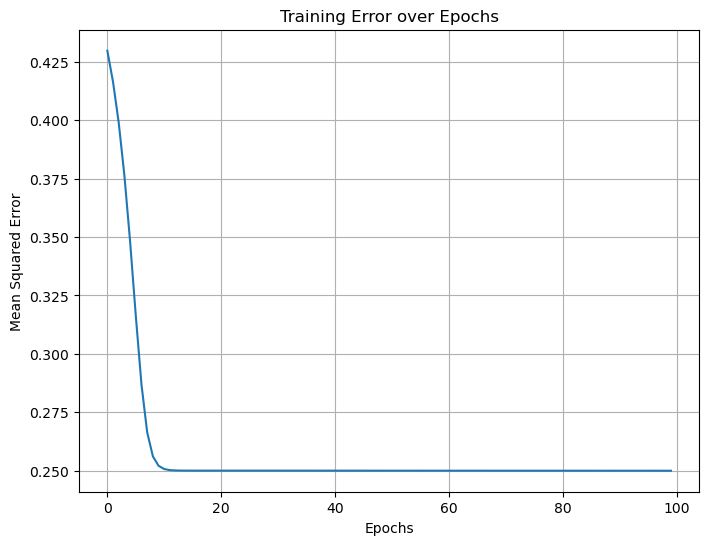

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Function to perform the forward pass
def forward_pass(X, weights, biases):
    layer_input = X
    outputs = []
    for i in range(len(weights)):
        layer_output = sigmoid(np.dot(layer_input, weights[i]) + biases[i])
        outputs.append(layer_output)
        layer_input = layer_output
    return outputs

# Function to perform the backward pass
def backward_pass(X, y, outputs, weights, biases):
    num_layers = len(weights)
    error_terms = [None] * num_layers
    gradients_wrt_weights = [None] * num_layers
    gradients_wrt_biases = [None] * num_layers

    error = y - outputs[-1]
    error_terms[-1] = error * sigmoid_derivative(outputs[-1])

    for i in range(num_layers - 1, 0, -1):
        gradients_wrt_weights[i] = np.dot(outputs[i - 1].T, error_terms[i])
        gradients_wrt_biases[i] = np.sum(error_terms[i], axis=0)
        error_terms[i - 1] = np.dot(error_terms[i], weights[i].T) * sigmoid_derivative(outputs[i - 1])

    gradients_wrt_weights[0] = np.dot(X.T, error_terms[0])
    gradients_wrt_biases[0] = np.sum(error_terms[0], axis=0)

    return gradients_wrt_weights, gradients_wrt_biases

# Function to update weights and biases based on gradients
def update_weights_biases(weights, biases, gradients_wrt_weights, gradients_wrt_biases, learning_rate):
    for i in range(len(weights)):
        weights[i] += learning_rate * gradients_wrt_weights[i]
        biases[i] += learning_rate * gradients_wrt_biases[i]
    return weights, biases

# Function to train the MLP
def train_MLP(X, y, num_hidden_layers, hidden_layer_units, learning_rate, epochs):
    input_dim = X.shape[1]
    output_dim = y.shape[1]

    # Initialize weights and biases randomly
    weights = [np.random.rand(input_dim, hidden_layer_units)]
    biases = [np.random.rand(hidden_layer_units)]

    for _ in range(num_hidden_layers - 1):
        weights.append(np.random.rand(hidden_layer_units, hidden_layer_units))
        biases.append(np.random.rand(hidden_layer_units))

    weights.append(np.random.rand(hidden_layer_units, output_dim))
    biases.append(np.random.rand(output_dim))

    training_errors = []

    for epoch in range(epochs):
        outputs = forward_pass(X, weights, biases)

        # Calculate error and append to list for visualization
        error = np.mean(np.square(y - outputs[-1]))
        training_errors.append(error)

        gradients_wrt_weights, gradients_wrt_biases = backward_pass(X, y, outputs, weights, biases)

        weights, biases = update_weights_biases(weights, biases, gradients_wrt_weights, gradients_wrt_biases, learning_rate)

    return training_errors

# Function to visualize training results
def visualize_training_results(training_errors):
    plt.figure(figsize=(8, 6))
    plt.plot(training_errors)
    plt.title('Training Error over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)
    plt.show()

# Define neural network parameters
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Example input
y = np.array([[0], [1], [1], [0]])  # Example output
num_hidden_layers = 2
hidden_layer_units = 4
learning_rate = 0.41
epochs = 100  # Fixed number of epochs

# Train the MLP and visualize training results
training_errors = train_MLP(X, y, num_hidden_layers, hidden_layer_units, learning_rate, epochs)
visualize_training_results(training_errors)


```{admonition} What does this graph mean?
:class: tip, dropdown
Observing the outcome of our training process, we notice that the [Mean Square Error](https://fedmug.github.io/kbtu-ml-book/eval_metrics/regression.html#mean-squared-error-mse) (MSE) has reached a stage where its decrease halts, indicating that the model might have reached a local minimum or a plateau in its learning phase. This signifies that initially, the model shows improvement by reducing errors between its predictions and actual values. This scenario could arise because the MLP might have converged to a minimum point where additional adjustments to the weights and biases do not notably reduce the MSE.
```

### Forward pass

<img src="forward_pass.png" alt="Alt text" width="600">


Presently, we shall delve deeper into the intricacies of the forward pass. As previously articulated, the forward pass constitutes the transmission of data across neuronal pathways, commencing from the initial layer and traversing successive layers until it culminates at the ultimate layer, commonly denoted as the output layer. 

Let's consider every step of this flow and start with the oponents of each step:

1) Input Data: The raw data fed into the neural network.

2) Weights ($\boldsymbol W_i$): $\boldsymbol W_i$ has shape $n_{i-1}\times n_i$. Represents the weights connecting layer $i-1$ to layer $i$.

3) Biases ($\boldsymbol b_i$): $\boldsymbol b_i$ has length $n_i$. Represents the biases for layer $i$.

4) Activation Functions: Introduce non-linearity to the network. Common functions include ReLU, Sigmoid, Tanh, etc.


<img src="forward_2.jpg" alt="Alt text" width="600">

$\boldsymbol W^{(1)}$ has shape $n_{\text{input}}\times n_{\text{hidden}_1}$.

For each subsequent hidden layer $i$:

<img src="forward_3.jpg" alt="Alt text" width="600">

$\boldsymbol W^{(i)}$ has shape $n_{\text{hidden}{i-1}}\times n{\text{hidden}_i}$.

#### Output Layer Calculation:

Compute the final output of the network using activations of the last hidden layer:

<img src="forward_4.jpg" alt="Alt text" width="600">

$\boldsymbol W^{(n)}$ has shape $n_{\text{hidden}{n-1}}\times n{\text{output}}$.
$\text{Output}_{\text{final}}$ represents the final output of the network.

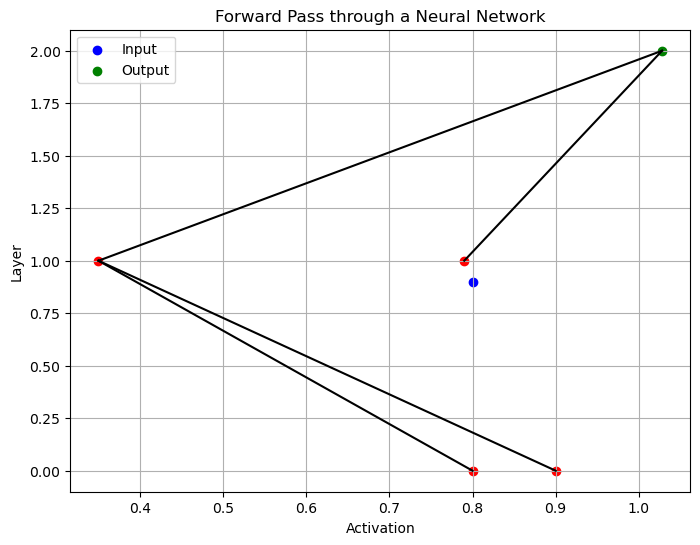

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the forward pass function
def forward_pass(inputs, weights, biases):
    layer_input = inputs
    outputs = [inputs]
    for w, b in zip(weights, biases):
        layer_output = np.dot(layer_input, w) + b
        layer_input = layer_output
        outputs.append(layer_output)
    return outputs

# Define neural network architecture (weights and biases)
weights = [np.array([[0.2, 0.4], [0.1, 0.3]]), np.array([[0.5], [0.7]])]
biases = [np.array([0.1, 0.2]), np.array([0.3])]

# Input data
input_data = np.array([[0.8, 0.9]])

# Perform forward pass
outputs = forward_pass(input_data, weights, biases)

# Visualize the forward pass
plt.figure(figsize=(8, 6))

# Plotting input data
plt.scatter(input_data[:, 0], input_data[:, 1], color='blue', label='Input')

# Plotting neural network layers
for i in range(len(outputs) - 1):
    layer = outputs[i][0]
    plt.scatter(layer, np.zeros_like(layer) + i, color='red')
    for j, x in enumerate(layer):
        plt.plot([x, outputs[i + 1][0][0]], [i, i + 1], color='black')

# Plotting output
output_x = outputs[-1][0][0]
plt.scatter(output_x, len(outputs) - 1, color='green', label='Output')

plt.xlabel('Activation')
plt.ylabel('Layer')
plt.title('Forward Pass through a Neural Network')
plt.legend()
plt.grid(True)
plt.show()


````{admonition} Question
:class: important
What does this graph give us?
```{admonition} Answer
:class: tip, dropdown
1) The hidden layer neuron is positively contributing to the activation of the output layer neurons. This is because the activation of the hidden layer neuron increases as the average activation of the output layer neurons increases.

2) The non-linear activation function is introducing complexity into the model. This is because the relationship between the hidden and output layer activations is not linear.

3) The model may be reaching a point of saturation. This is because the average output activation plateaus at higher hidden layer activations.
```


<img src="https://static.independent.co.uk/2023/05/09/15/sats.jpg" alt="Alt text" width="500">

<span style="display:none" id="q_forward_process">W3sicXVlc3Rpb24iOiAiSG93IG1hbnkgbGVhcm5hYmxlIHBhcmFtZXRlcnMgaW4gdGhlIE1MUCB3b3VsZCBiZSBpZiBMID0gMSwgd2l0aCBhbiBpbnB1dCBsYXllciBvZiAzIG5ldXJvbnMsIGEgaGlkZGVuIGxheWVyIG9mIDIgbmV1cm9ucywgYW5kIGFuIG91dHB1dCBsYXllciBvZiAxIG5ldXJvbj8iLCAidHlwZSI6ICJudW1lcmljIiwgImFuc3dlcnMiOiBbeyJ0eXBlIjogInZhbHVlIiwgInZhbHVlIjogMTMsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFRoZXJlIGFyZSAxMyBsZWFybmFibGUgcGFyYW1ldGVycyEifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiT29wcy4uLiBTb21ldGhpbmcgd2VudCB3cm9uZywgdHJ5IGFnYWluISJ9XX1d</span>

In [4]:
from jupyterquiz import display_quiz
display_quiz("#q_forward_process")

<IPython.core.display.Javascript object>

### Back propagation

<img src="backprop.png" alt="Alt text" width="600">

Proceeding to the backward propagation phase, previously indicated as the stage following the forward pass, where adaptations to the weights and biases occur in response to the network's output. During this phase, calculations encompass the Error Backpropagation, Parameter Updates, Learning Rate Adjustments, and related operations.

$\nabla_{\boldsymbol X_i}\mathcal L$: Denotes the gradients of the loss function with respect to the activations or hidden representations at layer $i$. These gradients are computed successively backward through the layers.

$\nabla_{\boldsymbol W_i} \mathcal L$: Represents the gradients of the loss function with respect to the weights $\boldsymbol W_i$ connecting the neurons between layer $i$ and $i+1$. These gradients are used to update the weights in order to minimize the loss.

$\nabla_{\boldsymbol B_i}\mathcal L$: Denotes the gradients of the loss function with respect to the biases $\boldsymbol B_i$ for layer $i+1$. These gradients help adjust the biases during the training process.

<span style="display:none" id="q_backward_process">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgcHJpbWFyeSBwdXJwb3NlIG9mIHRoZSBiYWNrd2FyZCBwYXNzPyIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBiYWNrd2FyZCBwYXNzIGlzIHVzZWQgdG8gY29tcHV0ZSB0aGUgbG9zcyBmdW5jdGlvbiBvbmx5LiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFdoaWxlIHRoZSBiYWNrd2FyZCBwYXNzIGlzIGludm9sdmVkIGluIGNhbGN1bGF0aW5nIGdyYWRpZW50cyByZWxhdGVkIHRvIHRoZSBsb3NzIGZ1bmN0aW9uLCBpdHMgc29sZSBwdXJwb3NlIGlzIG5vdCBsaW1pdGVkIHRvIGNvbXB1dGluZyB0aGUgbG9zcyBmdW5jdGlvbiBpdHNlbGYuIn0sIHsiYW5zd2VyIjogIkNvbXB1dGF0aW9uIG9mIHRoZSBncmFkaWVudCBvZiB0aGUgbG9zcyBmdW5jdGlvbiB3aXRoIHJlc3BlY3QgdG8gdGhlIGJpYXNlcy4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgdXBkYXRlIHByb2Nlc3Mgb2NjdXJzIHVzaW5nIHRoZXNlIGdyYWRpZW50cyBpbiBjb25qdW5jdGlvbiB3aXRoIGFuIG9wdGltaXphdGlvbiBhbGdvcml0aG0gKGUuZy4sIGdyYWRpZW50IGRlc2NlbnQpIGR1cmluZyB0aGUgdHJhaW5pbmcgcGhhc2UsIG5vdCBkaXJlY3RseSBkdXJpbmcgdGhlIGJhY2t3YXJkIHBhc3MuIn0sIHsiYW5zd2VyIjogIkNhbGN1bGF0aW9uIG9mIHRoZSBncmFkaWVudCBvZiB0aGUgbG9zcyBmdW5jdGlvbiB3aXRoIHJlc3BlY3QgdG8gdGhlIHdlaWdodHMuIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgVGhlIHByaW1hcnkgcHVycG9zZSBvZiB0aGUgYmFja3dhcmQgcGFzcyBpbiBiYWNrcHJvcGFnYXRpb24gaXMgdG8gY2FsY3VsYXRlIGdyYWRpZW50cyBvZiB0aGUgbG9zcyBmdW5jdGlvbiB3aXRoIHJlc3BlY3QgdG8gdGhlIG5ldHdvcmsncyBwYXJhbWV0ZXJzLiJ9LCB7ImFuc3dlciI6ICJUaGUgYmFja3dhcmQgcGFzcyBoZWxwcyBpbiB0aGUgaW5pdGlhbCBjb21wdXRhdGlvbiBvZiB0aGUgZm9yd2FyZCBwYXNzIGJ5IHByb3BhZ2F0aW5nIGlucHV0IGRhdGEgYmFja3dhcmQgdGhyb3VnaCB0aGUgbmV0d29yay4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgYmFja3dhcmQgcGFzcyBvY2N1cnMgYWZ0ZXIgdGhlIGZvcndhcmQgcGFzcyBhbmQgaW52b2x2ZXMgcHJvcGFnYXRpbmcgZ3JhZGllbnRzIGJhY2t3YXJkIHRocm91Z2ggdGhlIG5ldHdvcmsuICJ9XX1d</span>

In [5]:
from jupyterquiz import display_quiz
display_quiz("#q_backward_process")

<IPython.core.display.Javascript object>

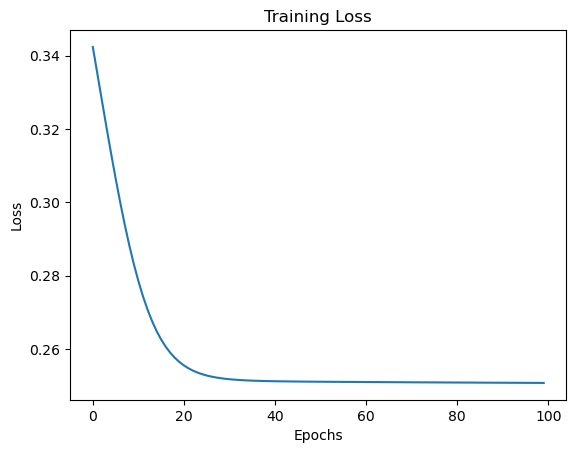

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of the ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Neural network architecture
input_size = 2
hidden_size = 3
output_size = 1

# Initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
biases_hidden = np.random.rand(1, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)
biases_output = np.random.rand(1, output_size)

# Input data
X = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
# Output data
y = np.array([[1], [1], [0], [0]])

# Learning rate
learning_rate = 0.1
epochs = 100

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = relu(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = sigmoid(output_layer_input)

    # Calculate loss
    loss = np.mean(np.square(y - predicted_output))
    losses.append(loss)

    # Backward pass
    output_error = y - predicted_output
    d_output = output_error * sigmoid_derivative(predicted_output)

    hidden_error = d_output.dot(weights_hidden_output.T)
    d_hidden = hidden_error * relu_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    biases_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    biases_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


````{admonition} Question
:class: important
What does this graph give us?
```{admonition} Answer
:class: tip, dropdown
1) Loss decreases over time: The plot shows a decreasing trend in the training loss, which is a good sign that the neural network is learning from the data. The loss starts around 0.34 and ends around 0.26.

2) ReLU activation might be a good choice: The use of ReLU activation in the hidden layer might be contributing to the good performance of the network. ReLU is known to be more efficient than sigmoid activation in many cases.

```

### Optimization techniques

The goal is to minimize the loss function with respect to parameters $\boldsymbol \theta$,

$$
\mathcal L = \mathcal L_{\boldsymbol\theta}(\boldsymbol {\widehat y}, \boldsymbol y) \to \min\limits_{\boldsymbol \theta}
$$

where
$$
\boldsymbol \theta = (\boldsymbol W_1, \boldsymbol b_1, \boldsymbol W_2, \boldsymbol b_2, \ldots, \boldsymbol W_L, \boldsymbol b_L)
$$

Let's use the standard technique — the gradient descent!

1. Start from some random parameters $\boldsymbol \theta_0$


2. Given a training sample $(\boldsymbol x, \boldsymbol y)$, do the **forward pass** and get the output $\boldsymbol {\widehat y} = F_{\boldsymbol \theta}(\boldsymbol x)$

3. Calculate the loss function
$\mathcal L_{\boldsymbol\theta}(\boldsymbol {\widehat y}, \boldsymbol y)$ and its gradient
$$
\nabla_{\boldsymbol\theta}\mathcal L_{\boldsymbol\theta}(\boldsymbol {\widehat y}, \boldsymbol y)
$$

4. Update the parameters:

$$
    \boldsymbol \theta = \boldsymbol \theta - \eta \nabla_{\boldsymbol\theta}\mathcal L_{\boldsymbol\theta}(\boldsymbol {\widehat y}, \boldsymbol y)
$$

5. Go to step 2 with next training sample

### Practical example

Suppose we have a neural network with two parameters $\theta_1 = 2$ and $\theta_2 = -3$. Implement one step of gradient descent for these parameters using a learning rate $\eta = 0.1$. Assume that the gradient of the loss function with respect to these parameters is $\nabla_{\boldsymbol\theta}\mathcal L_{\boldsymbol\theta} = [4, -5]$. Perform the parameter update using the gradient descent formula:

What are the updated values of $\theta_1$ and $\theta_2$ after one step of gradient descent?

Options:
- $\theta_1 = 1.6$, $\theta_2 = -3.5$

- $\theta_1 = 1.8$, $\theta_2 = -3.5$

- $\theta_1 = 1.6$, $\theta_2 = -2.5$

- $\theta_1 = 1.8$, $\theta_2 = -2.5$

Correct Answer:
$\theta_1 = 1.6$, $\theta_2 = -3.5$

Explanation:

Using the gradient descent formula, the updated values are calculated as follows:
- $\theta_1 = 2- 0.1 * 4 = 1.6$

- $\theta_2 = -3 - 0.1 * (-5) = -3 + 0.5 = -3.5$

Thus, after one step of gradient descent, $\theta_1$ is updated to 1.6, and $\theta_2$ is updated to -3.5.

In [ ]:
import plotly.graph_objs as go

# Case 1 parameters and gradients
theta1_case1, theta2_case1 = 2, -3
gradient1_case1, gradient2_case1 = 4, -5

# Case 2 parameters and gradients
theta1_case2, theta2_case2 = 1, -2
gradient1_case2, gradient2_case2 = 3, -4

# Learning rate
learning_rate = 0.1

# Gradient descent updates for Case 1
updated_theta1_case1 = theta1_case1 - learning_rate * gradient1_case1
updated_theta2_case1 = theta2_case1 - learning_rate * gradient2_case1

# Gradient descent updates for Case 2
updated_theta1_case2 = theta1_case2 - learning_rate * gradient1_case2
updated_theta2_case2 = theta2_case2 - learning_rate * gradient2_case2

# Plotting the updates for both cases
fig = go.Figure()

# Add updates for Case 1
fig.add_trace(go.Scatter(x=[theta1_case1, updated_theta1_case1],
                         y=[theta2_case1, updated_theta2_case1],
                         mode='lines+markers',
                         name='Case 1',
                         line=dict(color='blue', width=2),
                         marker=dict(color='blue', size=10)))

# Add updates for Case 2
fig.add_trace(go.Scatter(x=[theta1_case2, updated_theta1_case2],
                         y=[theta2_case2, updated_theta2_case2],
                         mode='lines+markers',
                         name='Case 2',
                         line=dict(color='red', width=2),
                         marker=dict(color='red', size=10)))

# Customize layout
fig.update_layout(title='Parameter Updates after One Step of Gradient Descent',
                  xaxis=dict(title='Theta 1'),
                  yaxis=dict(title='Theta 2'),
                  showlegend=True)

# Display plot
fig.show()


Each line starts at a point corresponding to the initial values of the parameters $\theta_1$ and $\theta_2$ for the respective cases.


The lines show the updates made to these parameters after one step of gradient descent. The new values of $\theta_1$ and $\theta_2$ are indicated by the ending point of each line.

The slope of each line indicates the magnitude and direction of the update for the parameters in one step of gradient descent.


### Batch training

Definition: Batch training involves updating model parameters using a batch of training samples simultaneously rather than updating them after each individual sample.

Batch Size ($B$): Represents the number of training samples aggregated together for parameter updates during each iteration of training.

Computational Efficiency: By processing multiple samples simultaneously, batch training offers computational efficiency through optimized matrix operations, leveraging parallelism in modern hardware.


It is compuationally inefficient to update all the parameters every time after passing a training sample. Instead, take a **batch** of size $B$ of training samples at a time and form the matrix
$\boldsymbol X_{\mathrm{in}}$ if the shape $B\times n_0$. Now each hidden representation is a matrix of the shape $B \times n_i$:

$$
\boldsymbol X_i = \psi_i(\boldsymbol X_{i-1} \boldsymbol W_i +\boldsymbol B_i)
$$

The output also has $B$ rows. For instance, in the case of multiclassification task we have

$$
    \boldsymbol X_L = \boldsymbol {\widehat Y} \in \mathbb R^{B\times K},
$$

$$
    \mathcal L(\boldsymbol {\widehat Y}, \boldsymbol Y) = -\frac 1B\sum\limits_{i = 1}^B \sum\limits_{k=1}^K Y_{ik}\log(\widehat Y_{ik})
$$

- $\boldsymbol X_{\mathrm{in}}$: Input matrix of shape $B \times n_0$ containing a batch of training samples.

- $\boldsymbol X_i$: Hidden representation matrix of shape $B \times n_i$ for the $i$-th layer.

- $\boldsymbol W_i$: Weight matrix for the $i$-th layer.

- $\boldsymbol B_i$: Bias matrix for the $i$-th layer.

- $\boldsymbol X_L$: Output matrix $\boldsymbol {\widehat Y}$ of shape $B \times K$, where $K$ represents the number of classes in a multiclassification task.

- $\boldsymbol Y$: Actual labels matrix of shape $B \times K$ for the multiclassification task.

- $\mathcal L(\boldsymbol {\widehat Y}, \boldsymbol Y)$: Loss function, specifically a cross-entropy loss, computed between the predicted output $\boldsymbol {\widehat Y}$ and the actual labels $\boldsymbol Y$. This loss function is averaged over the batch size $B$.

- The symbols $n_0$, $n_i$, and $K$ represent the dimensions or sizes of input features, hidden layers, and output classes respectively, while $B$ signifies the batch size.


<span style="display:none" id="q_batch_process">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSB0ZXJtIGJhdGNoIHNpemUgcmVwcmVzZW50IGluIGJhdGNoIHRyYWluaW5nPyIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBudW1iZXIgb2YgZXBvY2hzIGR1cmluZyB0cmFpbmluZy4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICJUaGUgbnVtYmVyIG9mIGxheWVycyBpbiB0aGUgbmV1cmFsIG5ldHdvcmsuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiVGhlIG51bWJlciBvZiB0cmFpbmluZyBzYW1wbGVzIGFnZ3JlZ2F0ZWQgdG9nZXRoZXIgZm9yIHBhcmFtZXRlciB1cGRhdGVzLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIn0sIHsiYW5zd2VyIjogIlRoZSBsZWFybmluZyByYXRlIG9mIHRoZSBtb2RlbC4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9XX1d</span>

In [ ]:
from jupyterquiz import display_quiz
display_quiz("#q_batch_process")